In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
%cd /content/drive/MyDrive/DS-case-study/Clothing_Sales
!git config --global user.email taeyoon.kim.ds@gmail.com
!git config --global user.name TaeyoonKim-DS
!git add .
!git commit -m "Update"
!git push

In [51]:
!pip install -r /content/drive/MyDrive/DS-case-study/Clothing_Sales/requirements.txt

In [52]:
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

data_path = "/content/drive/MyDrive/DS-case-study/[01]Data/"
df = pd.read_excel(data_path + 'WEAR_TS_ALL.xlsx')
df.head()

,SEASON,TYPE,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-03 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,2016-01-09 00:00:00,2016-01-10 00:00:00,2016-01-11 00:00:00,2016-01-12 00:00:00,2016-01-13 00:00:00,2016-01-14 00:00:00,2016-01-15 00:00:00,2016-01-16 00:00:00,2016-01-17 00:00:00,2016-01-18 00:00:00,2016-01-19 00:00:00,2016-01-20 00:00:00,2016-01-21 00:00:00,2016-01-22 00:00:00,2016-01-23 00:00:00,2016-01-24 00:00:00,2016-01-25 00:00:00,2016-01-26 00:00:00,2016-01-27 00:00:00,2016-01-28 00:00:00,2016-01-29 00:00:00,2016-01-30 00:00:00,2016-01-31 00:00:00,2016-02-01 00:00:00,2016-02-02 00:00:00,2016-02-03 00:00:00,2016-02-04 00:00:00,2016-02-05 00:00:00,2016-02-06 00:00:00,2016-02-07 00:00:00,2016-02-08 00:00:00,2016-02-09 00:00:00,2016-02-10 00:00:00,2016-02-11 00:00:00,2016-02-12 00:00:00,2016-02-13 00:00:00,2016-02-14 00:00:00,2016-02-15 00:00:00,2016-02-16 00:00:00,2016-02-17 00:00:00,...,2019-11-12 00:00:00,2019-11-13 00:00:00,2019-11-14 00:00:00,2019-11-15 00:00:00,2019-11-16 00:00:00,2019-11-17 00:00:00,2019-11-18 00:00:00,2019-11-19 00:00:00,2019-11-20 00:00:00,2019-11-21 00:00:00,2019-11-22 00:00:00,2019-11-23 00:00:00,2019-11-24 00:00:00,2019-11-25 00:00:00,2019-11-26 00:00:00,2019-11-27 00:00:00,2019-11-28 00:00:00,2019-11-29 00:00:00,2019-11-30 00:00:00,2019-12-01 00:00:00,2019-12-02 00:00:00,2019-12-03 00:00:00,2019-12-04 00:00:00,2019-12-05 00:00:00,2019-12-06 00:00:00,2019-12-07 00:00:00,2019-12-08 00:00:00,2019-12-09 00:00:00,2019-12-10 00:00:00,2019-12-11 00:00:00,2019-12-12 00:00:00,2019-12-13 00:00:00,2019-12-14 00:00:00,2019-12-15 00:00:00,2019-12-16 00:00:00,2019-12-17 00:00:00,2019-12-18 00:00:00,2019-12-19 00:00:00,2019-12-20 00:00:00,2019-12-21 00:00:00,2019-12-22 00:00:00,2019-12-23 00:00:00,2019-12-24 00:00:00,2019-12-25 00:00:00,2019-12-26 00:00:00,2019-12-27 00:00:00,2019-12-28 00:00:00,2019-12-29 00:00:00,2019-12-30 00:00:00,2019-12-31 00:00:00
0,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,6.0,4.0,1.0,3.0,5.0,6.0,2.0,9.0,2.0,7.0,4.0,5.0,3.0,19.0,18.0,13.0,3.0,6.0,16.0,19.0,14.0,23.0,3.0,2.0,11.0,13.0,13.0,10.0,18.0,30.0,10.0,13.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,1.0,2.0,3.0,1.0,3.0,1.0,1.0,6.0,2.0,12.0,14.0,1.0,7.0,3.0,8.0,5.0,11.0,1.0,NaN,11.0,9.0,4.0,5.0,10.0,4.0,5.0,6.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,NaN,7.0,6.0,8.0,4.0,9.0,5.0,1.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,1.0,2.0,1.0,3.0,4.0,9.0,2.0,NaN,4.0,6.0,3.0,1.0,8.0,1.0,4.0,2.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [53]:
df.shape

(515, 1463)

In [54]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rc
from matplotlib.dates import date2num

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

np.random.seed(0)

In [55]:
import mxnet as mx
mx.random.seed(0)


In [56]:
ts_df = pd.read_excel(data_path + 'WEAR_TS_ALL.xlsx')
ts_df

,SEASON,TYPE,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-03 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,2016-01-09 00:00:00,2016-01-10 00:00:00,2016-01-11 00:00:00,2016-01-12 00:00:00,2016-01-13 00:00:00,2016-01-14 00:00:00,2016-01-15 00:00:00,2016-01-16 00:00:00,2016-01-17 00:00:00,2016-01-18 00:00:00,2016-01-19 00:00:00,2016-01-20 00:00:00,2016-01-21 00:00:00,2016-01-22 00:00:00,2016-01-23 00:00:00,2016-01-24 00:00:00,2016-01-25 00:00:00,2016-01-26 00:00:00,2016-01-27 00:00:00,2016-01-28 00:00:00,2016-01-29 00:00:00,2016-01-30 00:00:00,2016-01-31 00:00:00,2016-02-01 00:00:00,2016-02-02 00:00:00,2016-02-03 00:00:00,2016-02-04 00:00:00,2016-02-05 00:00:00,2016-02-06 00:00:00,2016-02-07 00:00:00,2016-02-08 00:00:00,2016-02-09 00:00:00,2016-02-10 00:00:00,2016-02-11 00:00:00,2016-02-12 00:00:00,2016-02-13 00:00:00,2016-02-14 00:00:00,2016-02-15 00:00:00,2016-02-16 00:00:00,2016-02-17 00:00:00,...,2019-11-12 00:00:00,2019-11-13 00:00:00,2019-11-14 00:00:00,2019-11-15 00:00:00,2019-11-16 00:00:00,2019-11-17 00:00:00,2019-11-18 00:00:00,2019-11-19 00:00:00,2019-11-20 00:00:00,2019-11-21 00:00:00,2019-11-22 00:00:00,2019-11-23 00:00:00,2019-11-24 00:00:00,2019-11-25 00:00:00,2019-11-26 00:00:00,2019-11-27 00:00:00,2019-11-28 00:00:00,2019-11-29 00:00:00,2019-11-30 00:00:00,2019-12-01 00:00:00,2019-12-02 00:00:00,2019-12-03 00:00:00,2019-12-04 00:00:00,2019-12-05 00:00:00,2019-12-06 00:00:00,2019-12-07 00:00:00,2019-12-08 00:00:00,2019-12-09 00:00:00,2019-12-10 00:00:00,2019-12-11 00:00:00,2019-12-12 00:00:00,2019-12-13 00:00:00,2019-12-14 00:00:00,2019-12-15 00:00:00,2019-12-16 00:00:00,2019-12-17 00:00:00,2019-12-18 00:00:00,2019-12-19 00:00:00,2019-12-20 00:00:00,2019-12-21 00:00:00,2019-12-22 00:00:00,2019-12-23 00:00:00,2019-12-24 00:00:00,2019-12-25 00:00:00,2019-12-26 00:00:00,2019-12-27 00:00:00,2019-12-28 00:00:00,2019-12-29 00:00:00,2019-12-30 00:00:00,2019-12-31 00:00:00
0,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,6.0,4.0,1.0,3.0,5.0,6.0,2.0,9.0,2.0,7.0,4.0,5.0,3.0,19.0,18.0,13.0,3.0,6.0,16.0,19.0,14.0,23.0,3.0,2.0,11.0,13.0,13.0,10.0,18.0,30.0,10.0,13.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,1.0,2.0,3.0,1.0,3.0,1.0,1.0,6.0,2.0,12.0,14.0,1.0,7.0,3.0,8.0,5.0,11.0,1.0,NaN,11.0,9.0,4.0,5.0,10.0,4.0,5.0,6.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,NaN,7.0,6.0,8.0,4.0,9.0,5.0,1.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16SS,국내,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,1.0,2.0,1.0,3.0,4.0,9.0,2.0,NaN,4.0,6.0,3.0,1.0,8.0,1.0,4.0,2.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [57]:
print('df :', ts_df.shape)

df : (515, 1463)


In [58]:
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Columns: 1463 entries, SEASON to 2019-12-31 00:00:00
dtypes: float64(1461), object(2)
memory usage: 5.7+ MB


In [59]:
ts_df.dtypes

SEASON                  object
TYPE                    object
2016-01-01 00:00:00    float64
2016-01-02 00:00:00    float64
2016-01-03 00:00:00    float64
                        ...   
2019-12-27 00:00:00    float64
2019-12-28 00:00:00    float64
2019-12-29 00:00:00    float64
2019-12-30 00:00:00    float64
2019-12-31 00:00:00    float64
Length: 1463, dtype: object

In [60]:
ts_df = ts_df[ts_df['TYPE']=='국내']
ts_df.drop(columns=['TYPE'], inplace=True)

<ipython-input-60-c9b7ff135175>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_df.drop(columns=['TYPE'], inplace=True)


In [61]:
ts_df

,SEASON,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-03 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,2016-01-09 00:00:00,2016-01-10 00:00:00,2016-01-11 00:00:00,2016-01-12 00:00:00,2016-01-13 00:00:00,2016-01-14 00:00:00,2016-01-15 00:00:00,2016-01-16 00:00:00,2016-01-17 00:00:00,2016-01-18 00:00:00,2016-01-19 00:00:00,2016-01-20 00:00:00,2016-01-21 00:00:00,2016-01-22 00:00:00,2016-01-23 00:00:00,2016-01-24 00:00:00,2016-01-25 00:00:00,2016-01-26 00:00:00,2016-01-27 00:00:00,2016-01-28 00:00:00,2016-01-29 00:00:00,2016-01-30 00:00:00,2016-01-31 00:00:00,2016-02-01 00:00:00,2016-02-02 00:00:00,2016-02-03 00:00:00,2016-02-04 00:00:00,2016-02-05 00:00:00,2016-02-06 00:00:00,2016-02-07 00:00:00,2016-02-08 00:00:00,2016-02-09 00:00:00,2016-02-10 00:00:00,2016-02-11 00:00:00,2016-02-12 00:00:00,2016-02-13 00:00:00,2016-02-14 00:00:00,2016-02-15 00:00:00,2016-02-16 00:00:00,2016-02-17 00:00:00,2016-02-18 00:00:00,...,2019-11-12 00:00:00,2019-11-13 00:00:00,2019-11-14 00:00:00,2019-11-15 00:00:00,2019-11-16 00:00:00,2019-11-17 00:00:00,2019-11-18 00:00:00,2019-11-19 00:00:00,2019-11-20 00:00:00,2019-11-21 00:00:00,2019-11-22 00:00:00,2019-11-23 00:00:00,2019-11-24 00:00:00,2019-11-25 00:00:00,2019-11-26 00:00:00,2019-11-27 00:00:00,2019-11-28 00:00:00,2019-11-29 00:00:00,2019-11-30 00:00:00,2019-12-01 00:00:00,2019-12-02 00:00:00,2019-12-03 00:00:00,2019-12-04 00:00:00,2019-12-05 00:00:00,2019-12-06 00:00:00,2019-12-07 00:00:00,2019-12-08 00:00:00,2019-12-09 00:00:00,2019-12-10 00:00:00,2019-12-11 00:00:00,2019-12-12 00:00:00,2019-12-13 00:00:00,2019-12-14 00:00:00,2019-12-15 00:00:00,2019-12-16 00:00:00,2019-12-17 00:00:00,2019-12-18 00:00:00,2019-12-19 00:00:00,2019-12-20 00:00:00,2019-12-21 00:00:00,2019-12-22 00:00:00,2019-12-23 00:00:00,2019-12-24 00:00:00,2019-12-25 00:00:00,2019-12-26 00:00:00,2019-12-27 00:00:00,2019-12-28 00:00:00,2019-12-29 00:00:00,2019-12-30 00:00:00,2019-12-31 00:00:00
0,16SS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16SS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,6.0,4.0,1.0,3.0,5.0,6.0,2.0,9.0,2.0,7.0,4.0,5.0,3.0,19.0,18.0,13.0,3.0,6.0,16.0,19.0,14.0,23.0,3.0,2.0,11.0,13.0,13.0,10.0,18.0,30.0,10.0,13.0,12.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16SS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,1.0,2.0,3.0,1.0,3.0,1.0,1.0,6.0,2.0,12.0,14.0,1.0,7.0,3.0,8.0,5.0,11.0,1.0,NaN,11.0,9.0,4.0,5.0,10.0,4.0,5.0,6.0,9.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16SS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,NaN,7.0,6.0,8.0,4.0,9.0,5.0,1.0,4.0,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16SS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,1.0,2.0,1.0,3.0,4.0,9.0,2.0,NaN,4.0,6.0,3.0,1.0,8.0,1.0,4.0,2.0,7.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [62]:
ts_df = ts_df.groupby('SEASON').sum()
ts_df

,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,2016-01-10,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,2016-01-16,2016-01-17,2016-01-18,2016-01-19,2016-01-20,2016-01-21,2016-01-22,2016-01-23,2016-01-24,2016-01-25,2016-01-26,2016-01-27,2016-01-28,2016-01-29,2016-01-30,2016-01-31,2016-02-01,2016-02-02,2016-02-03,2016-02-04,2016-02-05,2016-02-06,2016-02-07,2016-02-08,2016-02-09,2016-02-10,2016-02-11,2016-02-12,2016-02-13,2016-02-14,2016-02-15,2016-02-16,2016-02-17,2016-02-18,2016-02-19,...,2019-11-12,2019-11-13,2019-11-14,2019-11-15,2019-11-16,2019-11-17,2019-11-18,2019-11-19,2019-11-20,2019-11-21,2019-11-22,2019-11-23,2019-11-24,2019-11-25,2019-11-26,2019-11-27,2019-11-28,2019-11-29,2019-11-30,2019-12-01,2019-12-02,2019-12-03,2019-12-04,2019-12-05,2019-12-06,2019-12-07,2019-12-08,2019-12-09,2019-12-10,2019-12-11,2019-12-12,2019-12-13,2019-12-14,2019-12-15,2019-12-16,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-21,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
SEASON,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16SS,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,3.0,7.0,6.0,1.0,3.0,6.0,25.0,20.0,38.0,25.0,28.0,21.0,33.0,41.0,44.0,91.0,100.0,57.0,73.0,79.0,96.0,82.0,170.0,38.0,11.0,104.0,165.0,104.0,155.0,182.0,210.0,105.0,130.0,108.0,124.0,152.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17SS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18SS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,4.0,-1.0,0.0,0.0,0.0,0.0,0.0,-6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0
19SS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,3.0,-1.0,-3.0,5.0,-6.0,2.0,12.0,40.0,-9.0,17.0,-4.0,-5.0,0.0,4.0,-1.0,0.0,-2.0,-3.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20SS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0


In [63]:
ts_df = ts_df.T
ts_df


SEASON,16SS,17SS,18SS,19SS,20SS
2016-01-01,0.0,0.0,0.0,0.0,0.0
2016-01-02,0.0,0.0,0.0,0.0,0.0
2016-01-03,0.0,0.0,0.0,0.0,0.0
2016-01-04,0.0,0.0,0.0,0.0,0.0
2016-01-05,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2019-12-27,0.0,0.0,1.0,0.0,0.0
2019-12-28,0.0,0.0,3.0,0.0,2.0
2019-12-29,0.0,0.0,0.0,0.0,2.0
2019-12-30,0.0,0.0,0.0,0.0,0.0


In [64]:
ts_df.index # Object type

Index([2016-01-01 00:00:00, 2016-01-02 00:00:00, 2016-01-03 00:00:00,
       2016-01-04 00:00:00, 2016-01-05 00:00:00, 2016-01-06 00:00:00,
       2016-01-07 00:00:00, 2016-01-08 00:00:00, 2016-01-09 00:00:00,
       2016-01-10 00:00:00,
       ...
       2019-12-22 00:00:00, 2019-12-23 00:00:00, 2019-12-24 00:00:00,
       2019-12-25 00:00:00, 2019-12-26 00:00:00, 2019-12-27 00:00:00,
       2019-12-28 00:00:00, 2019-12-29 00:00:00, 2019-12-30 00:00:00,
       2019-12-31 00:00:00],
      dtype='object', length=1461)

In [65]:
ts_df.index = pd.to_datetime(ts_df.index) # Object to datetime type
ts_df

SEASON,16SS,17SS,18SS,19SS,20SS
2016-01-01,0.0,0.0,0.0,0.0,0.0
2016-01-02,0.0,0.0,0.0,0.0,0.0
2016-01-03,0.0,0.0,0.0,0.0,0.0
2016-01-04,0.0,0.0,0.0,0.0,0.0
2016-01-05,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2019-12-27,0.0,0.0,1.0,0.0,0.0
2019-12-28,0.0,0.0,3.0,0.0,2.0
2019-12-29,0.0,0.0,0.0,0.0,2.0
2019-12-30,0.0,0.0,0.0,0.0,0.0


In [66]:
ts_df.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', length=1461)

In [67]:
df = pd.concat([
                    ts_df[ts_df.index.year==2016]['16SS'],
                    ts_df[ts_df.index.year==2017]['17SS'],
                    ts_df[ts_df.index.year==2018]['18SS'],
                    ts_df[ts_df.index.year==2019]['19SS']
            ])
df = pd.DataFrame(df, columns=['sales'])
df

,sales
2016-01-01,0.0
2016-01-02,0.0
2016-01-03,0.0
2016-01-04,0.0
2016-01-05,2.0
...,...
2019-12-27,0.0
2019-12-28,0.0
2019-12-29,0.0
2019-12-30,0.0


<Axes: >

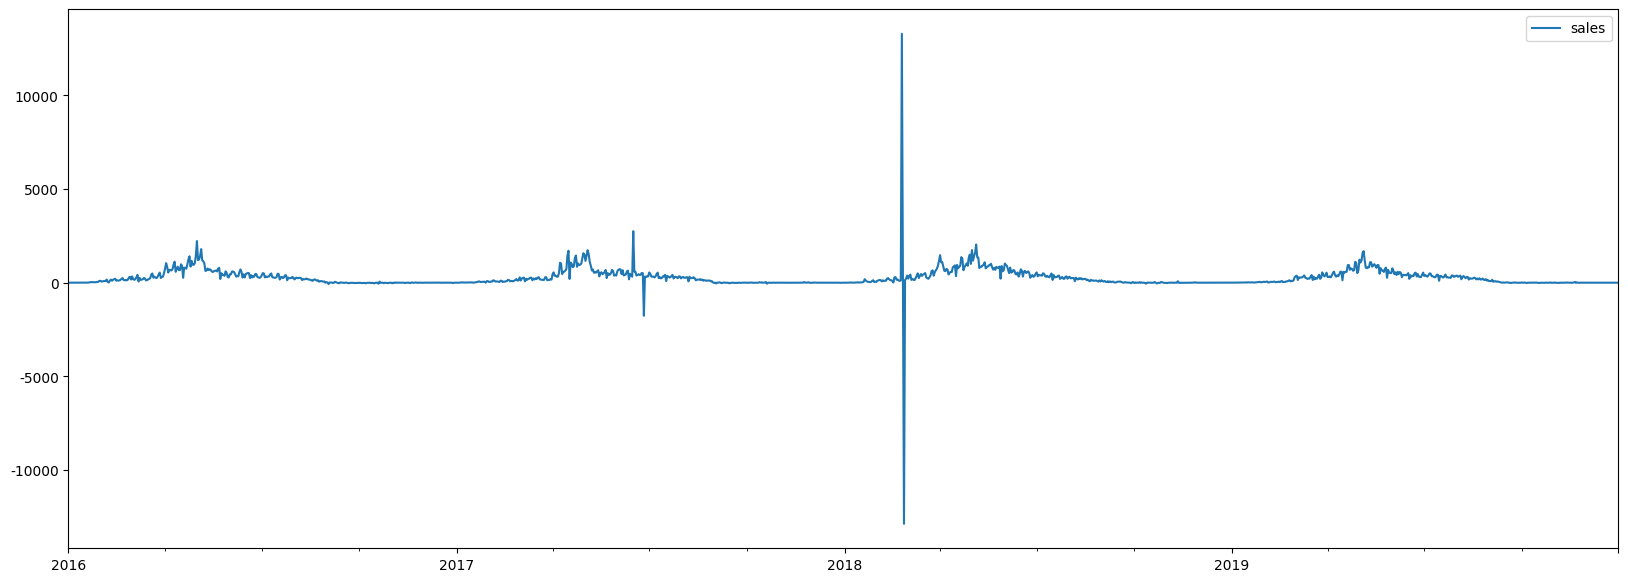

In [68]:
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
df.plot(figsize=(20, 7))

In [69]:
df[(df['sales']<-1000) | (df['sales']>2500)] = 0

<Axes: >

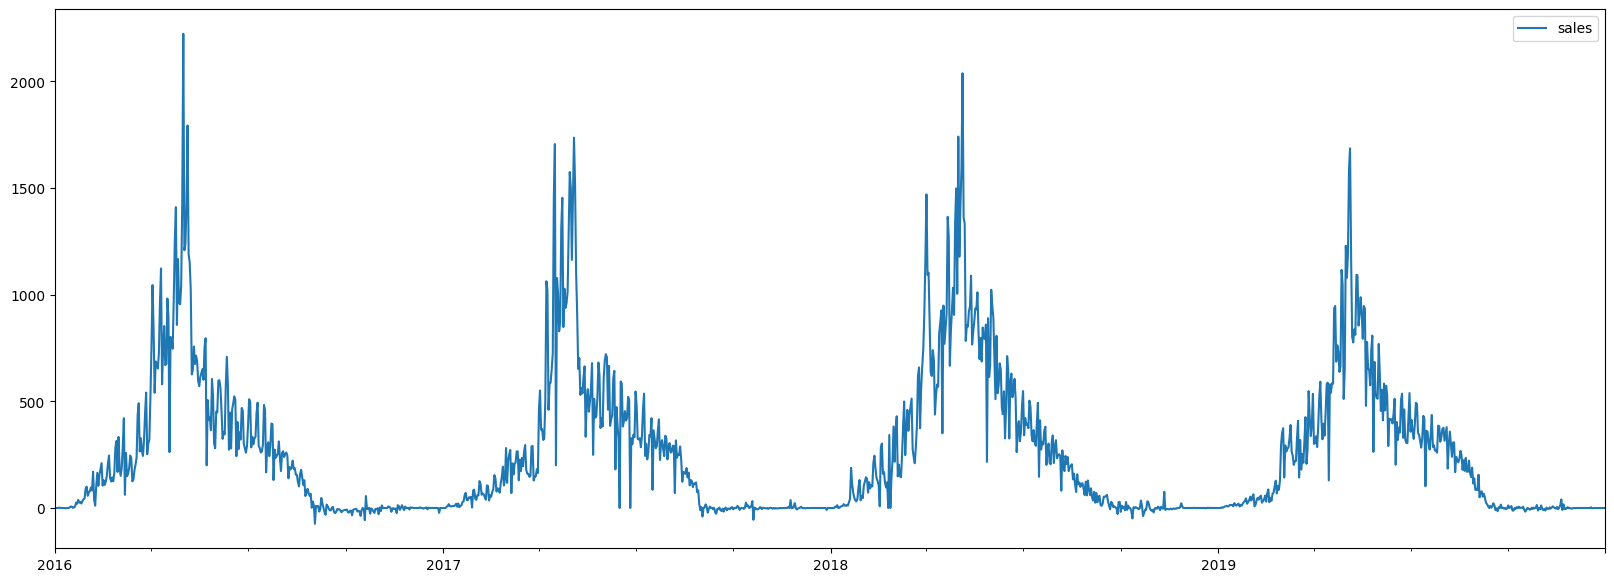

In [70]:
df.plot(figsize=(20, 7))

In [71]:
# 학습데이터는 2019년 여름 시즌 이전까지
train_df = df[:-200]
# 테스트 데이터는 2019년 여름 시즌부터 겨울 시즌전까지 Peak 100일에 대한 예측
test_df = df[-200:-100]

<Axes: >

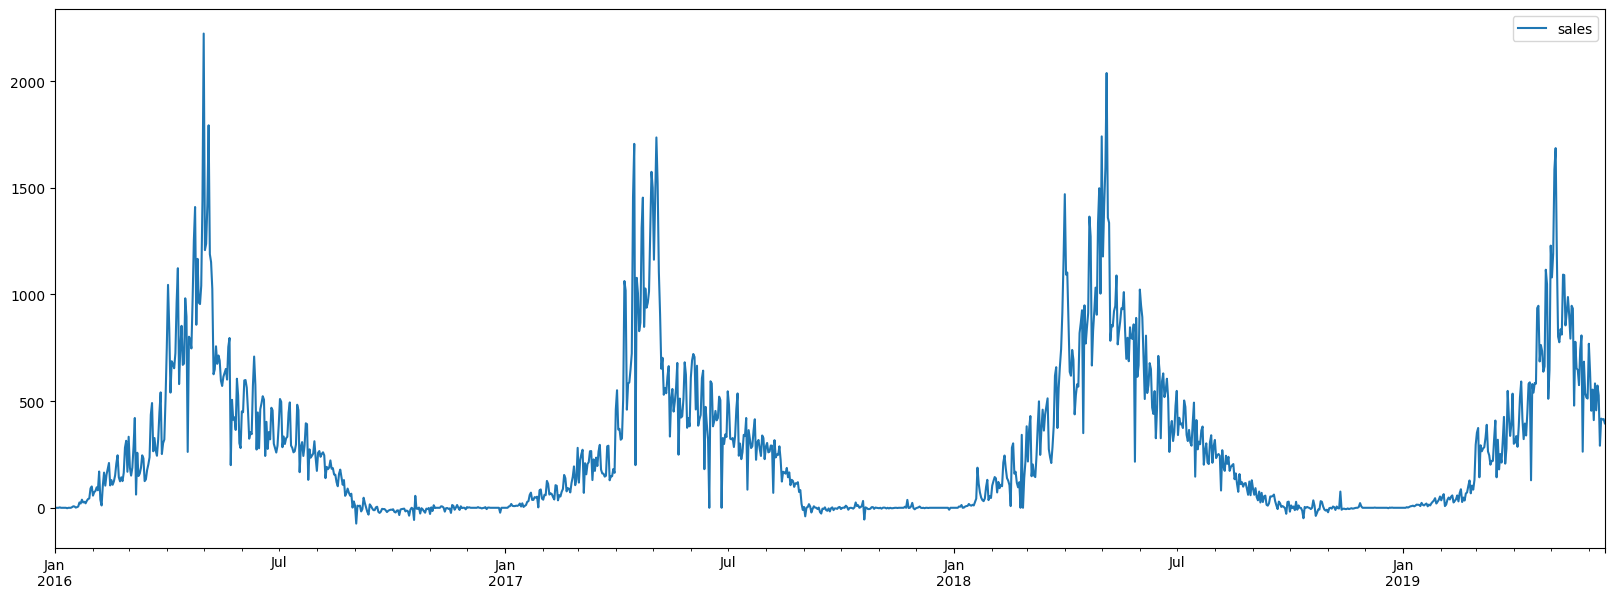

In [72]:
train_df.plot(figsize=(20,7))

<Axes: >

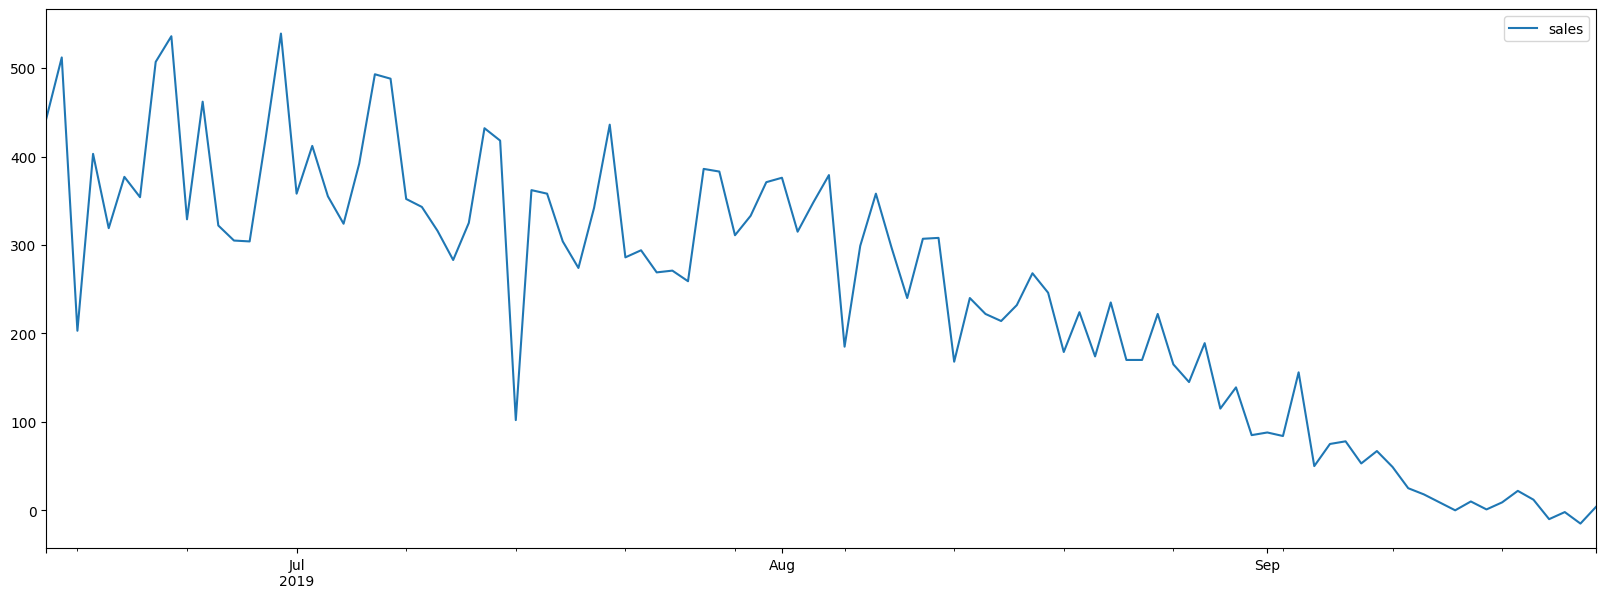

In [73]:
test_df.plot(figsize=(20,7))

## Time series data model using DeepAR

In [74]:
from gluonts.dataset.common import ListDataset
from gluonts.dataset.field_names import FieldName
from gluonts.mx.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
from pathlib import Path

In [75]:
def plot_prob_forecasts(ts_entry, forecast_entry): # Plot one for entry, Plot two for forecasted values
    prediction_intervals = (90.0, 50.0) #
    legend = ["Sales","observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(20, 7)) # Which axis will be shared

    ts_entry.plot(ax=ax)
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()

In [76]:
train_df.head(1)

,sales
2016-01-01,0.0


In [77]:
test_df.head(1)

,sales
2019-06-15,442.0


In [78]:
train_df.values.flatten()

array([  0.,   0.,   0., ..., 414., 416., 396.])

In [79]:
# DeepAR 알고리즘을 사용하기 위해 미리 만들어둔 DataFrame을 ListDataset으로 다시 생성
train_ds = ListDataset([{FieldName.TARGET: train_df.values.flatten(),
                         FieldName.START: pd.Timestamp("2016-01-01 00:00:00", freq='D')
                        }],
                      freq='D')

test_ds = ListDataset([{FieldName.TARGET: test_df.values.flatten(),
                         FieldName.START: pd.Timestamp("2019-06-15 00:00:00", freq='D')
                        }],
                      freq='D')

<ipython-input-79-26cd68555cd5>:3: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  FieldName.START: pd.Timestamp("2016-01-01 00:00:00", freq='D')
<ipython-input-79-26cd68555cd5>:8: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  FieldName.START: pd.Timestamp("2019-06-15 00:00:00", freq='D')


In [80]:
test_ds

[{'target': array([442., 512., 203., 403., 319., 377., 354., 507., 536., 329., 462.,
         322., 305., 304., 418., 539., 358., 412., 355., 324., 392., 493.,
         488., 352., 343., 316., 283., 325., 432., 418., 102., 362., 358.,
         304., 274., 342., 436., 286., 294., 269., 271., 259., 386., 383.,
         311., 333., 371., 376., 315., 348., 379., 185., 299., 358., 297.,
         240., 307., 308., 168., 240., 222., 214., 232., 268., 246., 179.,
         224., 174., 235., 170., 170., 222., 165., 145., 189., 115., 139.,
          85.,  88.,  84., 156.,  50.,  75.,  78.,  53.,  67.,  49.,  25.,
          18.,   9.,   0.,  10.,   1.,   9.,  22.,  12., -10.,  -2., -15.,
           4.], dtype=float32),
  'start': Period('2019-06-15', 'D')}]

In [81]:
# DeepAR(AutoRegression)
estimator = DeepAREstimator(
    # Data Period (D, W, M, Y)
    freq='D',
    # Trainer, cpu | gpu, epochs.
    trainer=Trainer(ctx="cpu", epochs=30, learning_rate=1E-3, hybridize=True, num_batches_per_epoch=30,), # assumption : Every 30 days data feature changes
    # Deeplearning layer
    num_layers=4,
    # lstm cell
    num_cells=40,
    context_length=30,
    cell_type='lstm', #gru
    prediction_length=30

)
predictor = estimator.train(train_ds) #3.27


100%|██████████| 30/30 [00:06<00:00,  4.40it/s, epoch=30/30, avg_epoch_loss=4.28]


In [82]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_ds,  # test dataset
    predictor=predictor,  # predictor
    num_samples=10,  # number of sample paths we want for evaluation
)

forecasts = list(forecast_it)
tss = list(ts_it)



In [ ]:
forecasts[0]

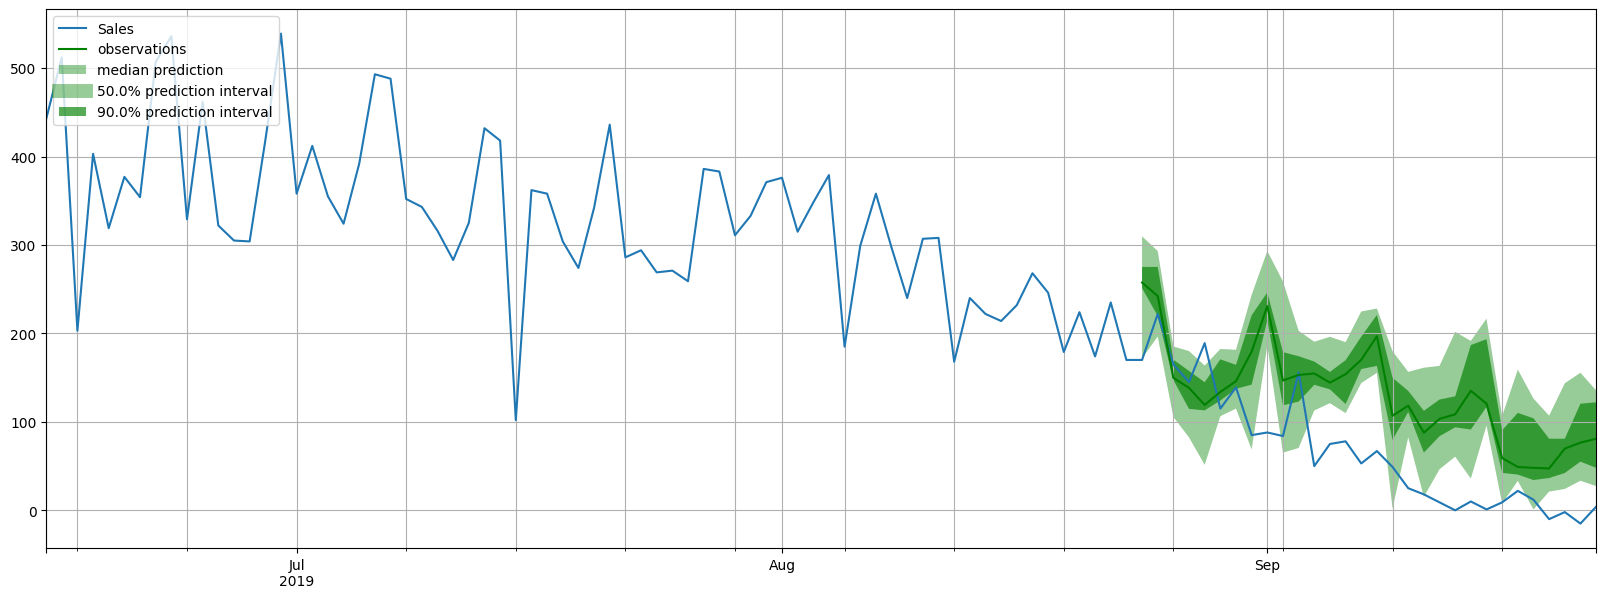

In [84]:
ts_entry = tss[0]
test_ds_entry = next(iter(test_ds))
forecast_entry = forecasts[0]

plot_prob_forecasts(ts_entry, forecast_entry)

## Time series modeling Error result

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
mean_squared_error(list(forecast_entry.quantile(0.5)), list(ts_entry[0][-30:]), squared=False) #ts_entry# -

80.39300583438906

In [86]:
mean_absolute_percentage_error(list(forecast_entry.quantile(0.5)), list(ts_entry[0][-30:]))

0.6143787691370041

## Make a dataset for RandomForestRegressor

In [87]:
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

def get_slope(array):
    y = np.array(array)
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    return slope

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    return mape

In [88]:
rdf = df

In [89]:
rdf

,sales
2016-01-01,0.0
2016-01-02,0.0
2016-01-03,0.0
2016-01-04,0.0
2016-01-05,2.0
...,...
2019-12-27,0.0
2019-12-28,0.0
2019-12-29,0.0
2019-12-30,0.0


In [90]:
rdf['slope7'] = rdf['sales'].rolling(7).apply(get_slope, raw=True) # 7 times rolling sales data and get slope
rdf['slope21'] = rdf['sales'].rolling(21).apply(get_slope, raw=True) # 21 days forecasting line

rdf['std7'] = rdf['sales'].rolling(7).std(raw=True) # 7 days standard deviation
rdf['std21'] = rdf['sales'].rolling(21).std(raw=True)

rdf['mean7'] = rdf['sales'].rolling(7).mean(raw=True) # 7 days mean
rdf['mean21'] = rdf['sales'].rolling(21).mean(raw=True)

rdf['skew7'] = rdf['sales'].rolling(7).skew() # Skewness
rdf['skew21'] = rdf['sales'].rolling(21).skew()

rdf['kurt7'] = rdf['sales'].rolling(7).kurt() # Kurtness
rdf['kurt21'] = rdf['sales'].rolling(21).kurt()

rdf['min7'] = rdf['sales'].rolling(7).min() # min value
rdf['min21'] = rdf['sales'].rolling(21).min()

rdf['max7'] = rdf['sales'].rolling(7).max() # max value
rdf['max21'] = rdf['sales'].rolling(21).max()

rdf

<ipython-input-90-f9e908e64f10>:4: FutureWarning: Passing additional kwargs to Rolling.std has no impact on the result and is deprecated. This will raise a TypeError in a future version of pandas.
  rdf['std7'] = rdf['sales'].rolling(7).std(raw=True)
<ipython-input-90-f9e908e64f10>:5: FutureWarning: Passing additional kwargs to Rolling.std has no impact on the result and is deprecated. This will raise a TypeError in a future version of pandas.
  rdf['std21'] = rdf['sales'].rolling(21).std(raw=True)
<ipython-input-90-f9e908e64f10>:7: FutureWarning: Passing additional kwargs to Rolling.mean has no impact on the result and is deprecated. This will raise a TypeError in a future version of pandas.
  rdf['mean7'] = rdf['sales'].rolling(7).mean(raw=True)
<ipython-input-90-f9e908e64f10>:8: FutureWarning: Passing additional kwargs to Rolling.mean has no impact on the result and is deprecated. This will raise a TypeError in a future version of pandas.
  rdf['mean21'] = rdf['sales'].rolling(21).m

,sales,slope7,slope21,std7,std21,mean7,mean21,skew7,skew21,kurt7,kurt21,min7,min21,max7,max21
2016-01-01,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.0,0.0,-0.002597,0.0,0.740013,0.0,0.047619,0.0,3.195566,-3.0,14.146539,0.0,-1.0,0.0,3.0
2019-12-28,0.0,0.0,-0.003896,0.0,0.740013,0.0,0.047619,0.0,3.195566,-3.0,14.146539,0.0,-1.0,0.0,3.0
2019-12-29,0.0,0.0,-0.005195,0.0,0.740013,0.0,0.047619,0.0,3.195566,-3.0,14.146539,0.0,-1.0,0.0,3.0
2019-12-30,0.0,0.0,-0.006494,0.0,0.740013,0.0,0.047619,0.0,3.195566,-3.0,14.146539,0.0,-1.0,0.0,3.0


In [91]:
rdf = rdf[31:-122]
rdf

,sales,slope7,slope21,std7,std21,mean7,mean21,skew7,skew21,kurt7,kurt21,min7,min21,max7,max21
2016-02-01,57.0,10.428571,3.935065,29.668807,28.585461,55.285714,26.142857,0.707934,1.414898,-0.996791,1.687694,21.0,0.0,100.0,100.0
2016-02-02,73.0,7.428571,4.170130,25.927555,29.665597,62.714286,29.619048,0.432936,1.131092,-1.569140,0.591354,33.0,0.0,100.0,100.0
2016-02-03,79.0,4.928571,4.388312,22.779481,30.712337,69.285714,33.380952,-0.009294,0.890337,-1.599134,-0.201782,41.0,0.0,100.0,100.0
2016-02-04,96.0,3.750000,4.724675,20.796062,32.582934,77.142857,37.952381,-0.605401,0.728907,-0.889447,-0.711343,44.0,1.0,100.0,100.0
2016-02-05,82.0,-0.464286,4.797403,14.797040,32.904624,82.571429,41.714286,-0.671901,0.525719,0.109354,-1.088270,57.0,1.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-27,145.0,-6.250000,-6.789610,32.690468,56.287316,183.000000,227.809524,0.895658,0.599335,-0.546034,-0.107521,145.0,145.0,235.0,358.0
2019-08-28,189.0,-6.892857,-5.433766,32.493223,48.250290,185.142857,219.761905,0.641046,0.395539,-0.840631,-0.665575,145.0,145.0,235.0,308.0
2019-08-29,115.0,-7.285714,-5.690909,33.446475,49.996905,168.000000,211.095238,0.035360,0.224170,0.890255,-0.180060,115.0,115.0,222.0,308.0
2019-08-30,139.0,-10.107143,-6.214286,35.146632,51.899078,163.571429,206.285714,0.431834,0.350925,0.142680,-0.307589,115.0,115.0,222.0,308.0


##Split data into train/test

In [92]:
y = rdf['sales']
X = rdf.drop('sales', axis=1).fillna(0)
X = X[:-30]
y = y[30:]

train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.03, random_state = 0, shuffle=False)

MAPE: 63.40072156296858


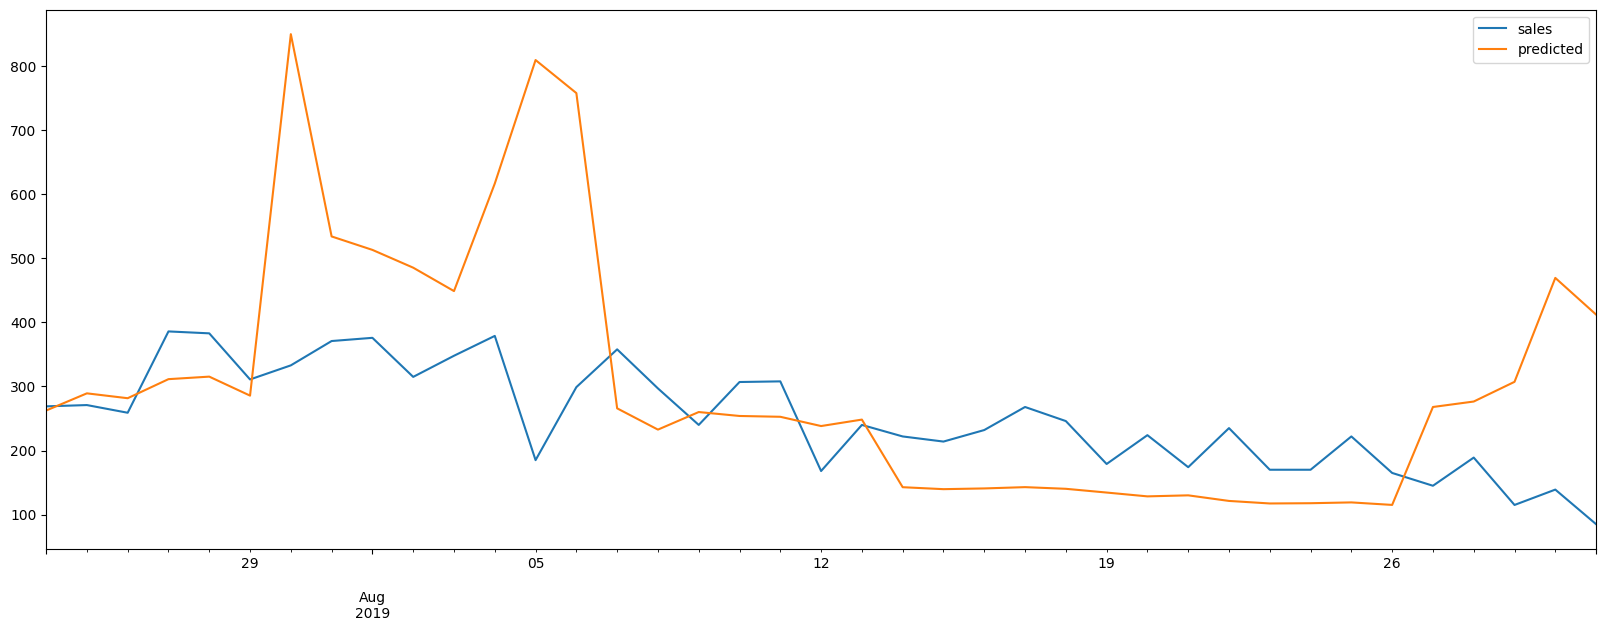

In [93]:
# Default 세팅으로 RandomForest 학습
rf = RandomForestRegressor(random_state = 0)
rf.fit(train_features, train_labels)
mape = evaluate(rf, test_features, test_labels)
predicted = rf.predict(test_features)
pdf = pd.DataFrame(test_labels)
pdf['predicted'] = predicted
pdf.plot(figsize=(20, 7))
print(f"MAPE: {mape}")

## Tune by hand to decrease underfitting

MAPE: 31.949452461456456


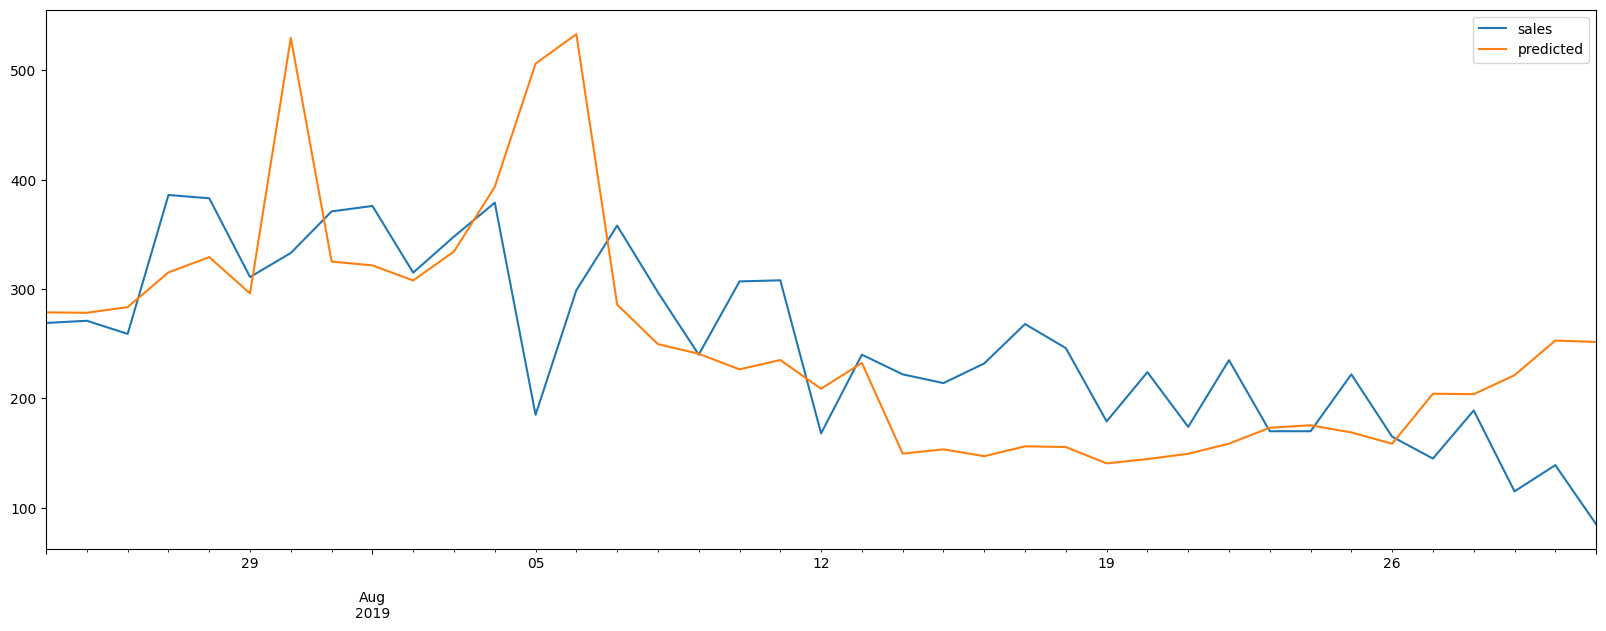

In [94]:
# Under fitting을 조정하기 위한 n_estimator와 max_features만 조정
rf = RandomForestRegressor(random_state = 0, n_estimators=200, max_features=4)
rf.fit(train_features, train_labels)
mape = evaluate(rf, test_features, test_labels)
predicted = rf.predict(test_features)
pdf = pd.DataFrame(test_labels)
pdf['predicted'] = predicted
pdf.plot(figsize=(20, 7))
print(f"MAPE: {mape}")

## Add more feature to consider additional characteristics

In [95]:
#해마다 늘어나는 판매량 반영
rdf['year'] = rdf.index.year
#월마다 바뀌는 판매량 반영
rdf['month'] = rdf.index.month
#요일별 판매량 반영
rdf['weekofday'] = rdf.index.dayofweek

y = rdf['sales']
X = rdf.drop('sales', axis=1).fillna(0)
X = X[:-30]
y = y[30:]

train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.03, random_state = 0, shuffle=False)

<ipython-input-95-0852de7eaef8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf['year'] = rdf.index.year
<ipython-input-95-0852de7eaef8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf['month'] = rdf.index.month
<ipython-input-95-0852de7eaef8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

MAPE: 20.541401180000847


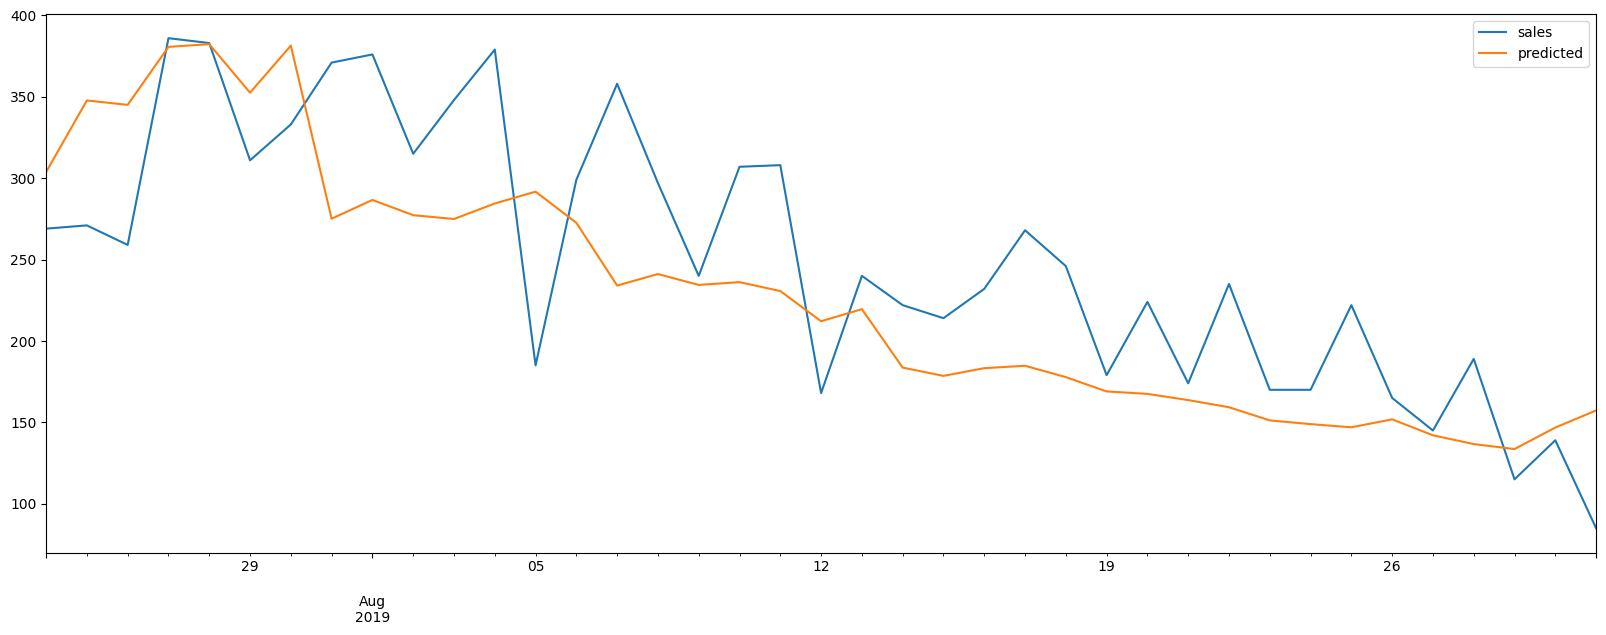

In [96]:
rf = RandomForestRegressor(random_state = 0, n_estimators=200, max_features=4)
rf.fit(train_features, train_labels)
mape = evaluate(rf, test_features, test_labels)
predicted = rf.predict(test_features)
pdf = pd.DataFrame(test_labels)
pdf['predicted'] = predicted
pdf.plot(figsize=(20, 7))
print(f"MAPE: {mape}")

#Lesson and Learned

## 시계열 분석에서 가장 중요한 부분은 무엇일까?

### 1. 데이터 확인이 무엇보다 중요한 분석이 시계열 분석이다.
### 2. 날짜형 데이터 타입을 다룰 때, 날짜 형식이 데이터 원천에 따라 다를 수 있으므로 날짜 형식을 가장 먼저 확인해야 한다.
### 3. 다음으로는 날짜 사이에 결측이 있는지를 꼭 확인해야 하며, 결측이 있는 경우 학습이 제대로 되지 않을 수 있다.
### 4. RNN을 사용하는 경우, 데이터의 특성을 충분히 반영할 수 있는 hyperparameter를 세팅해야 한다.

## 단변량 데이터로만으로는 시계열의 특성이 반영되지 않는다고 판단될 때,

### 1. 단변량 데이터를 특정 Window size를 기준으로 다변량으로 feature를 생성하여 Regression 방법으로 바꿔볼 수 있다.
### 2. 항상 더 좋은 결과를 기대할 수는 없지만, 본 실습에서의 문제처럼 요일별로 특성을 나타내는 경우에는 효과가 좋다.
### 3. 본 실습에서는 hyperparameter를 DeepAR과 RandomForest 모두 튜닝하지 않았지만 튜닝까지 할 경우 더 나을 결과를 기대할 수 있다.